# Multiple Linear Regression (Song Popularity Prediction)

## Explanation

### Objective

create a machine learning model that can predict a song popularity, using Multiple Linear Regression algorithm.

### Column Descriptions

- ***song_name*** = Song title.
- ***song_popularity (target)*** = Song popularity level (0-100).
- ***song_duration_ms*** = Song duration in milliseconds.
- ***acousticness*** = Song's "acoustic" level (0.0 - 1.0). The higher the number, the more acoustic (without electric/synth).
- ***danceability*** = How danceable this song is (0.0 - 1.0).
- ***energy*** = Song energy/intensity level (0.0 - 1.0). Metal songs are high energy, sleep songs are low.
- ***instrumentalness*** = Prediction of whether this song is solely instrumental without vocals (0.0 - 1.0).
- ***key*** = Song's root note (0 = C, 1 = C#, 2 = D, etc.). This is actually a category.
- ***liveness*** = Detects whether this song is a live or studio recording. High values ​​= live performance.
-  ***Loudness*** = Sound level in decibels (dB). Usually a negative number (e.g., -5 dB).
- ***audio_mode*** = Song modality (1 = Major, 0 = Minor). It's a number, so it's safe.
- ***speechiness*** = How many words are spoken (e.g., Rap/Podcast).
- ***tempo*** = Song speed in BPM (Beats Per Minute).
- ***time_signature*** = Time signature (e.g., 4 beats, 3 beats).
- ***audio_valence*** = Song "happiness" level (0.0 - 1.0). High = Happy/Cheerful, Low = Sad/Depressed.

## A. Data Preparation

### A.1 Import Libraries

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [123]:
try:
    df = pd.read_csv('song_data.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Berhasil Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [124]:
df.shape

(18835, 15)

### A.4 Viewing Data Informations

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


### A.5 Viewing Data Statistics

In [126]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.00,52.99,21.91,0.00,40.00,56.00,69.00,100.00
song_duration_ms,18835.00,218211.59,59887.54,12000.00,184339.50,211306.00,242844.00,1799346.00
acousticness,18835.00,0.26,0.29,0.00,0.02,0.13,0.42,1.00
danceability,18835.00,0.63,0.16,0.00,0.53,0.65,0.75,0.99
energy,18835.00,0.64,0.21,0.00,0.51,0.67,0.81,1.00
instrumentalness,18835.00,0.08,0.22,0.00,0.00,0.00,0.00,1.00
key,18835.00,5.29,3.61,0.00,2.00,5.00,8.00,11.00
liveness,18835.00,0.18,0.14,0.01,0.09,0.12,0.22,0.99
loudness,18835.00,-7.45,3.83,-38.77,-9.04,-6.55,-4.91,1.58
audio_mode,18835.00,0.63,0.48,0.00,0.00,1.00,1.00,1.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [127]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [128]:
df.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18830,Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,0.015700,3,0.119,-12.020,1,0.0328,106.063,4,0.323
18834,Up to Me,60,193533,0.911,0.640,0.381,0.000254,4,0.104,-11.790,1,0.0302,91.490,4,0.581


### A.7 Viewing Duplicated Data

In [129]:
df.duplicated().sum()

np.int64(3909)

In [130]:
df.drop_duplicates(inplace=True)

### A.8 Viewing Missing Data

In [131]:
df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

### A.9 Viewing Outlier Data

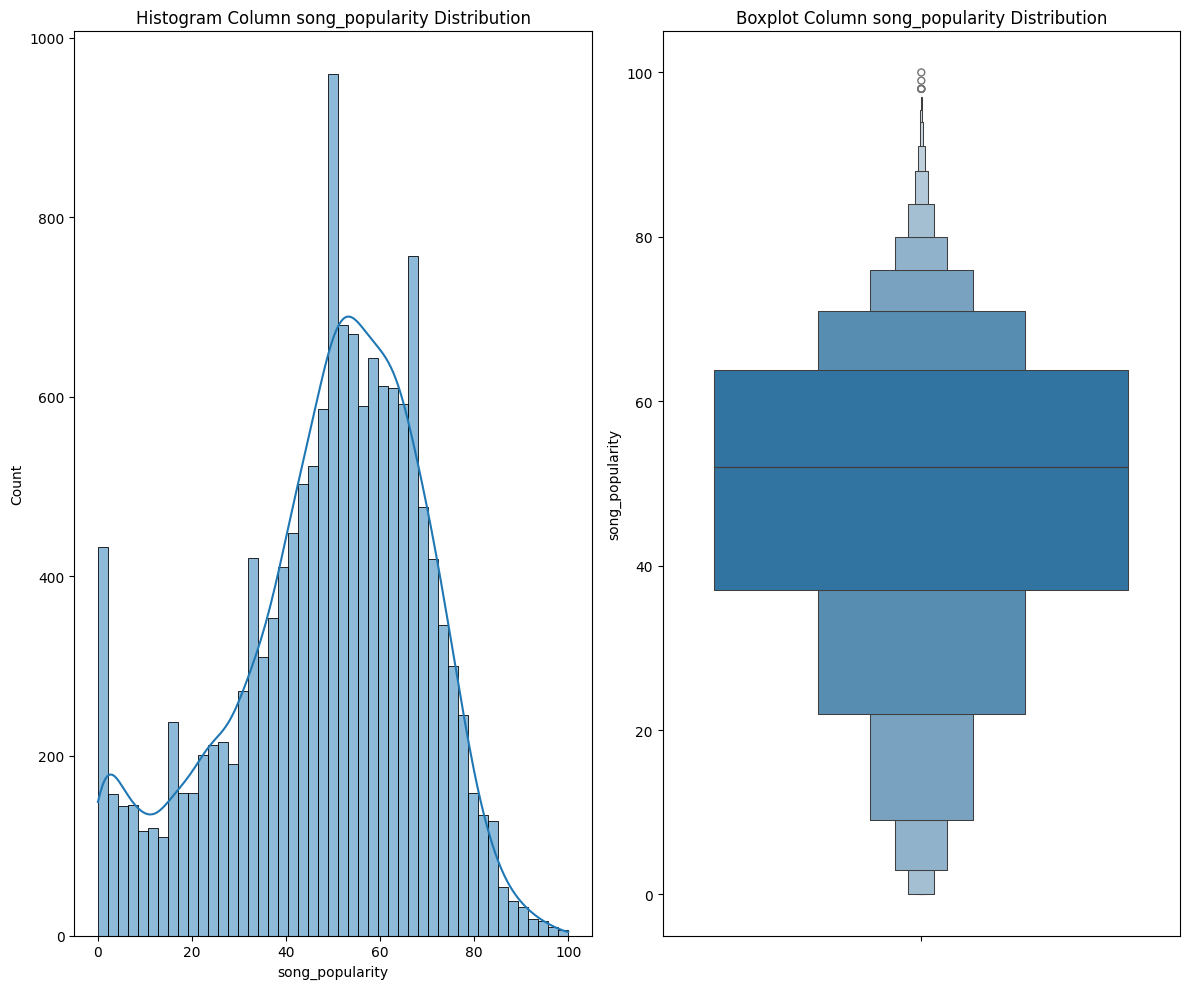

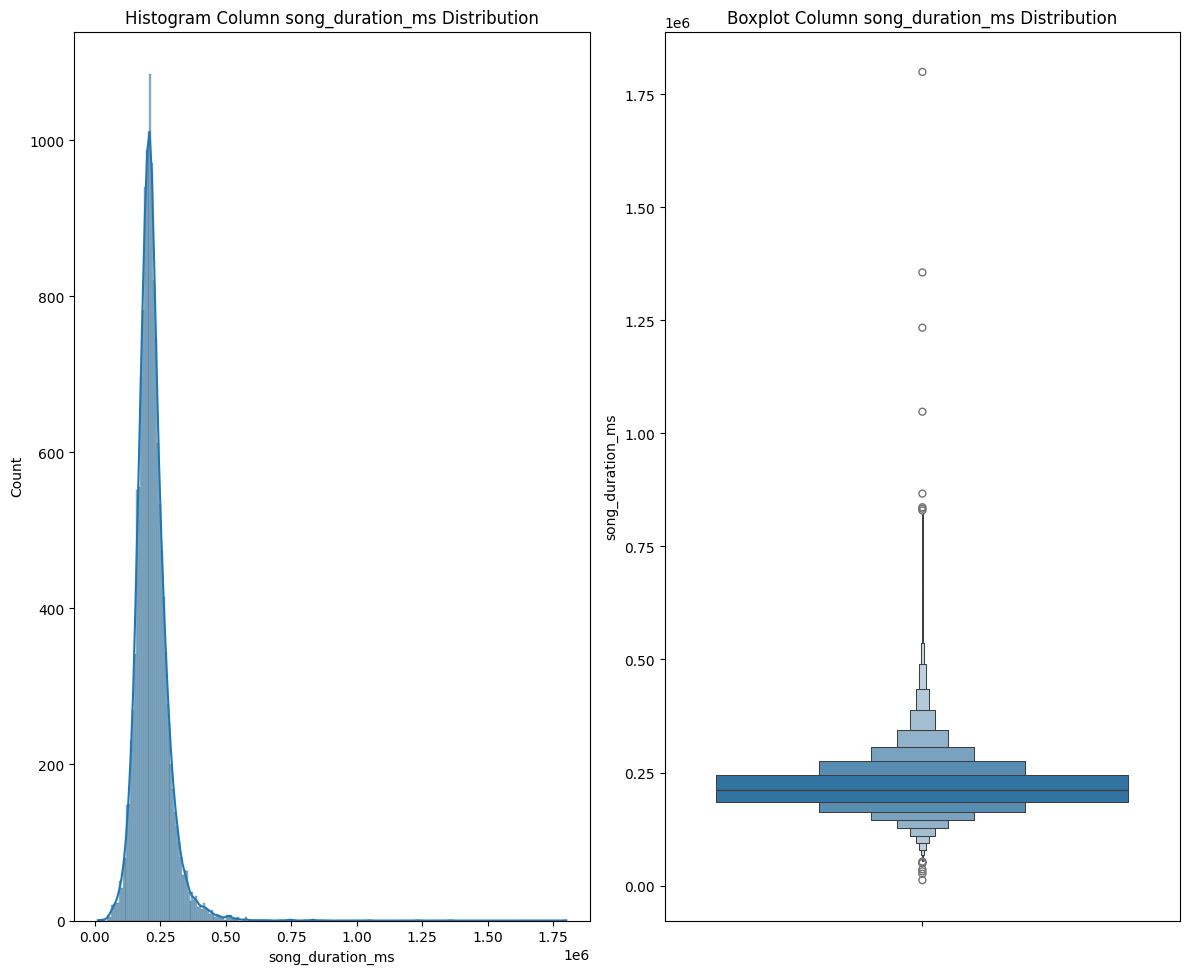

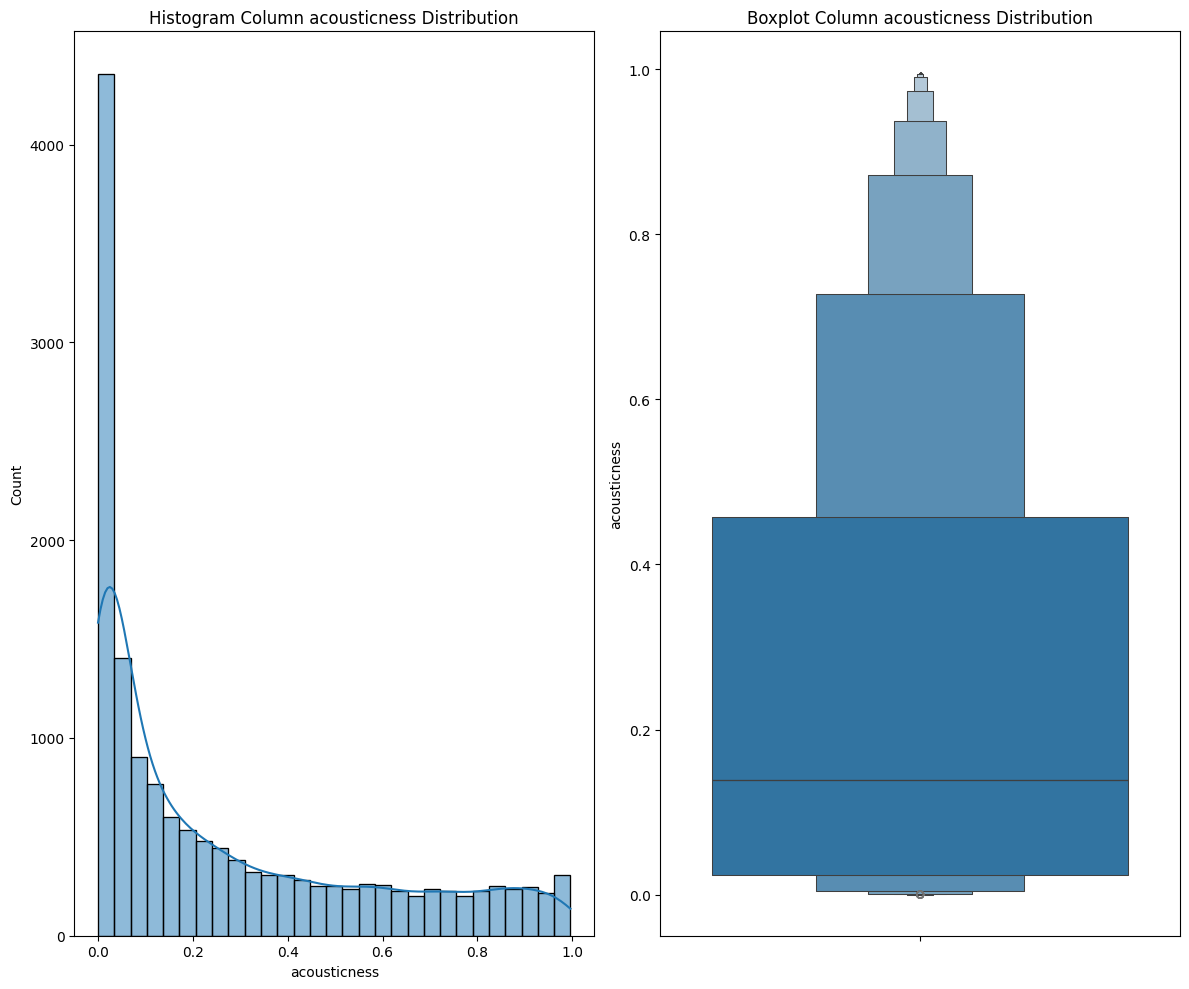

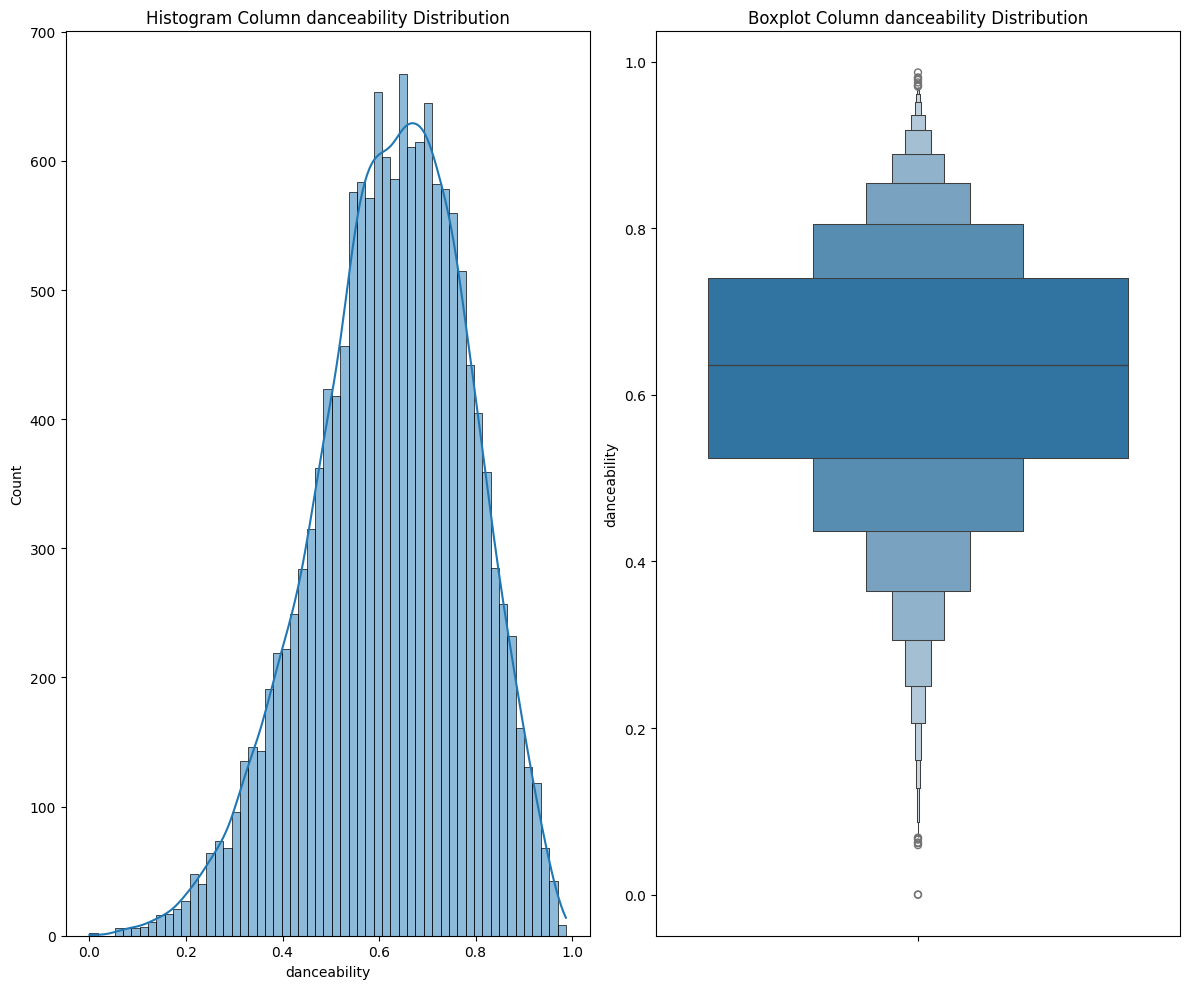

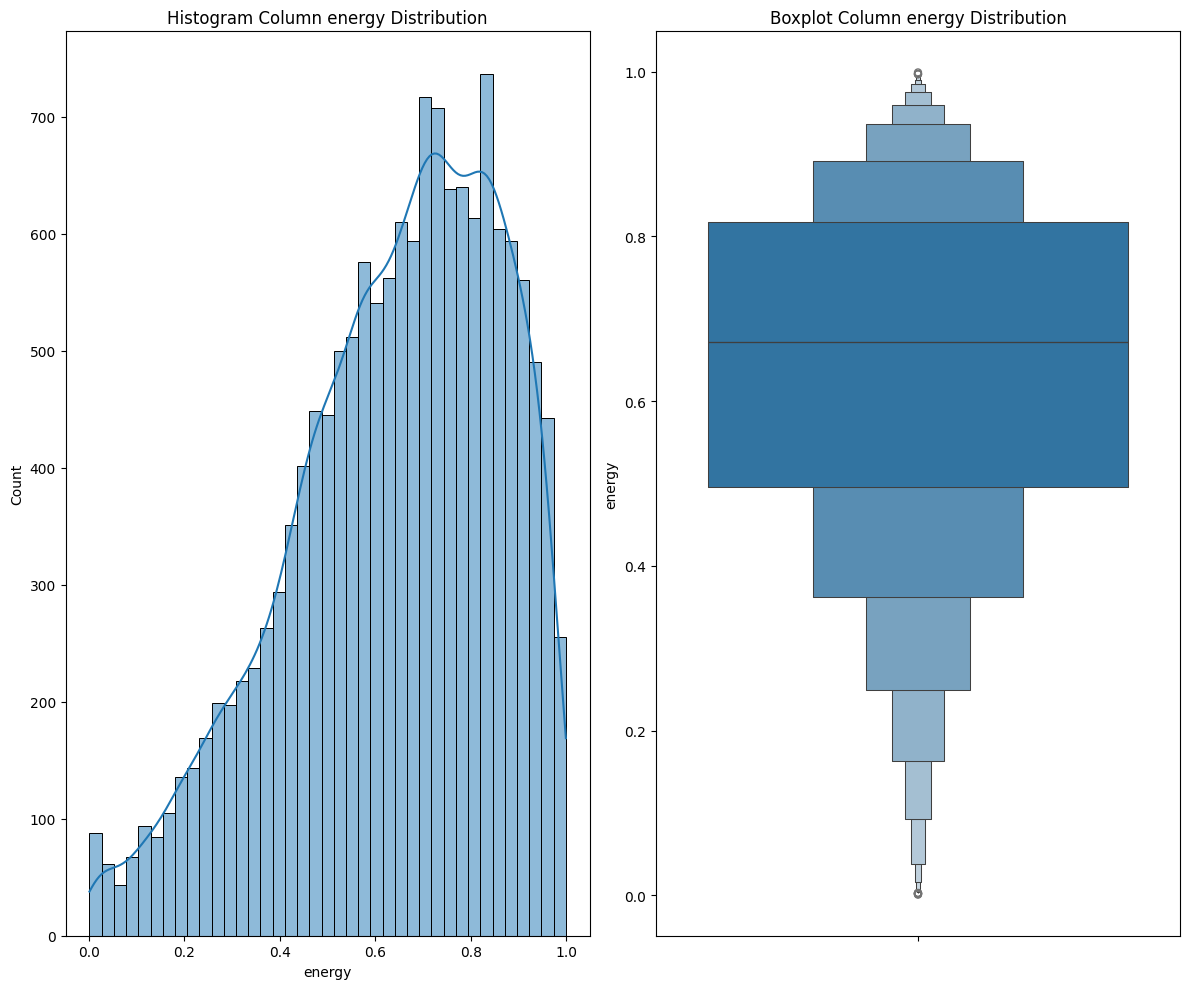

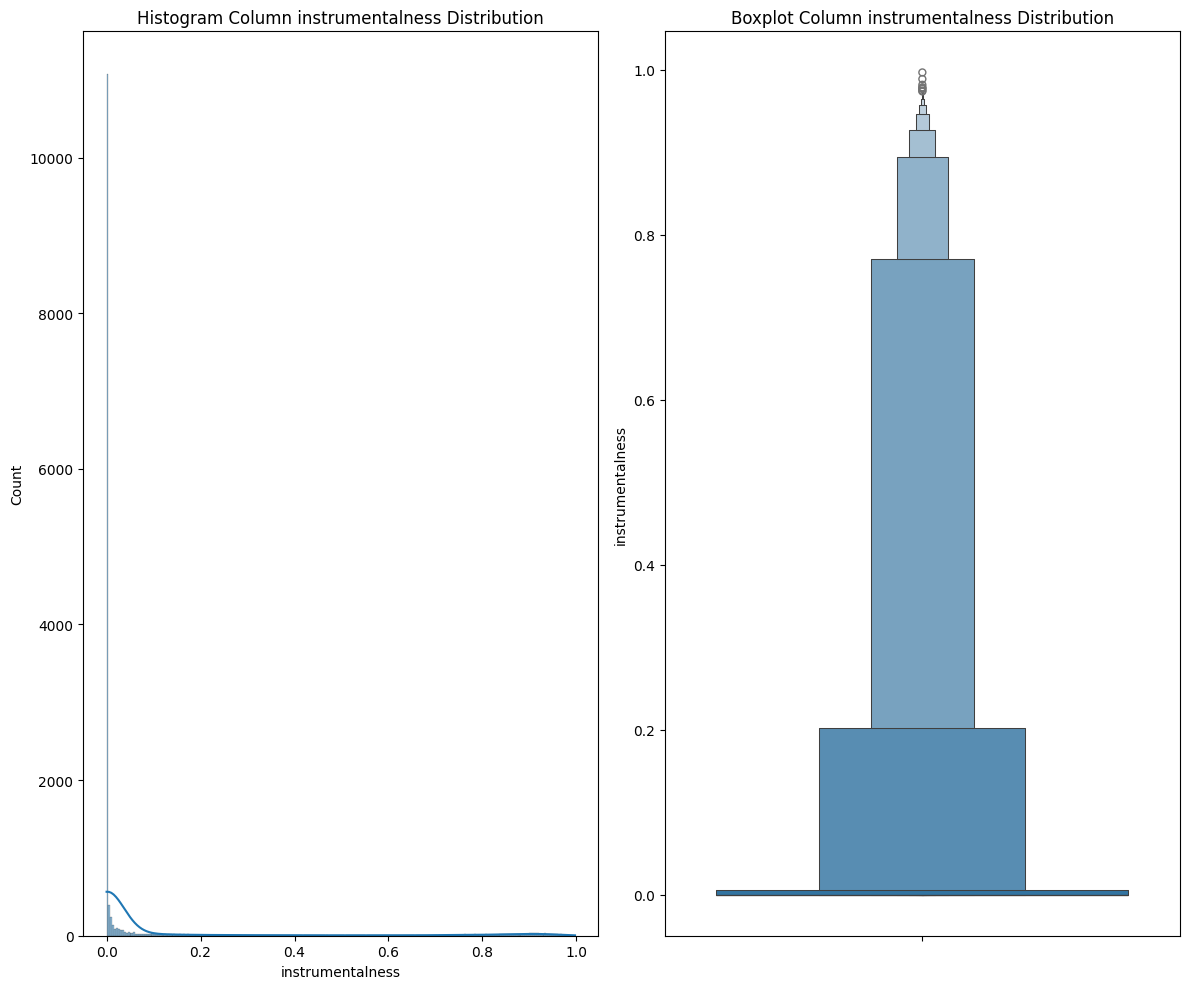

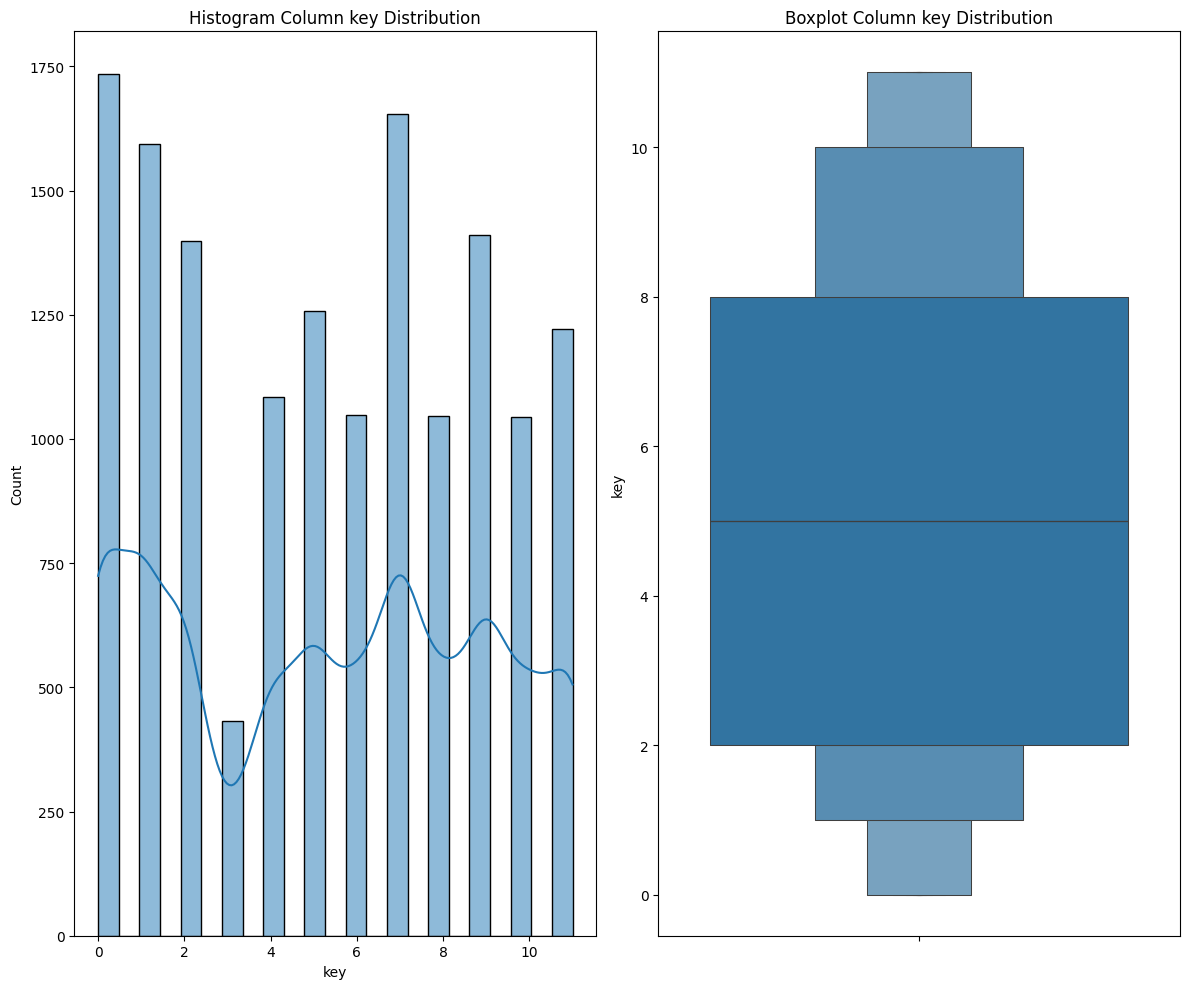

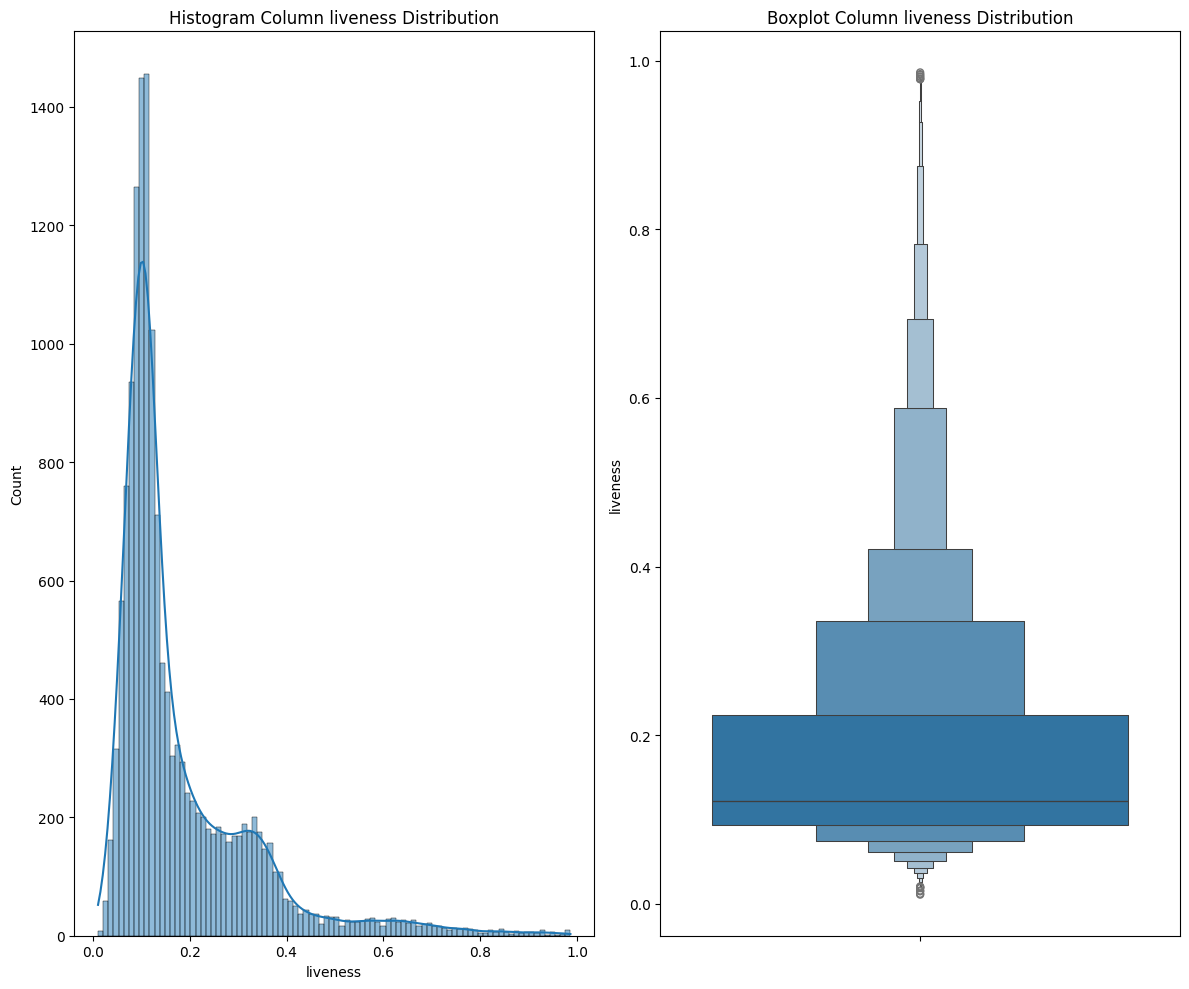

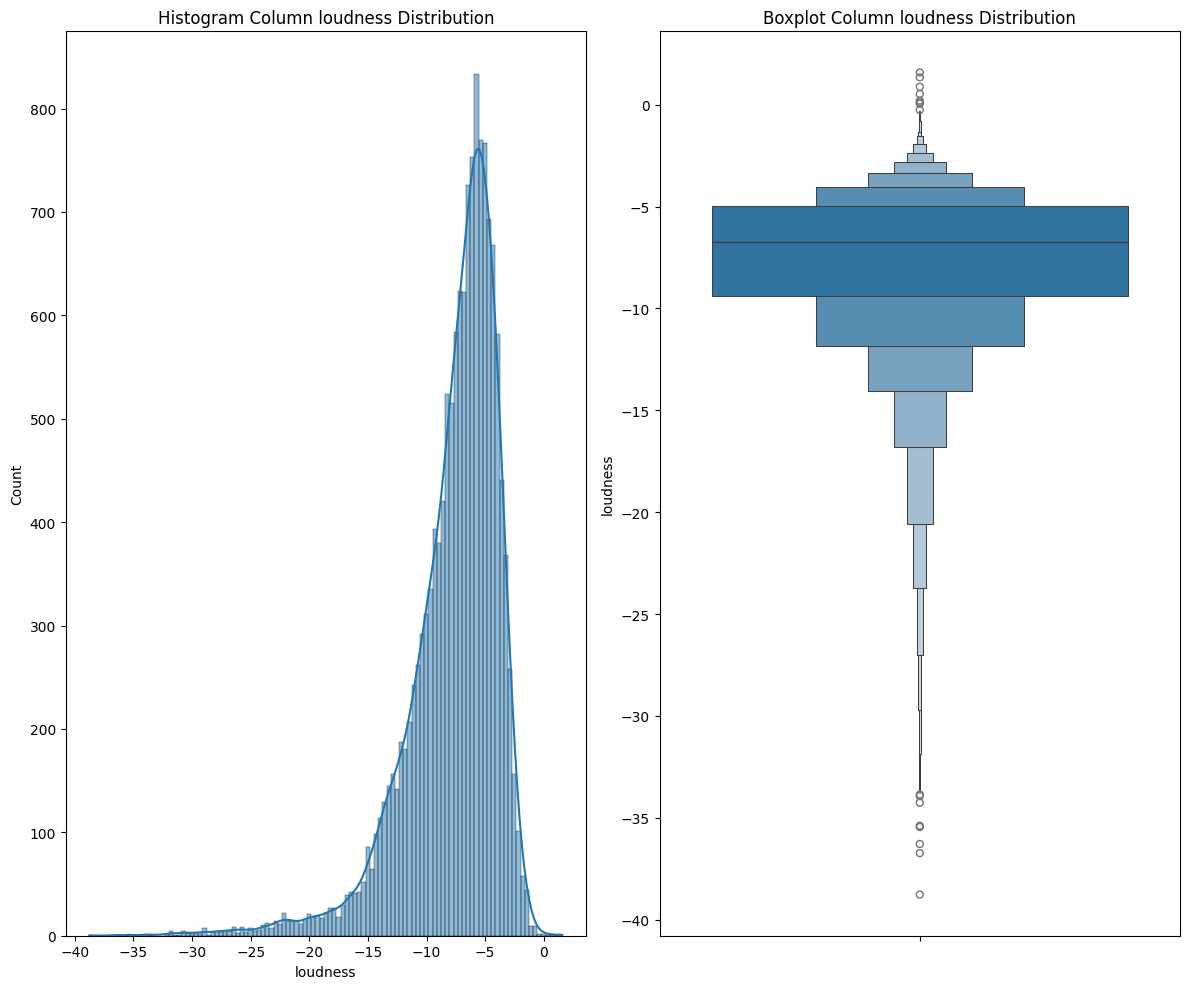

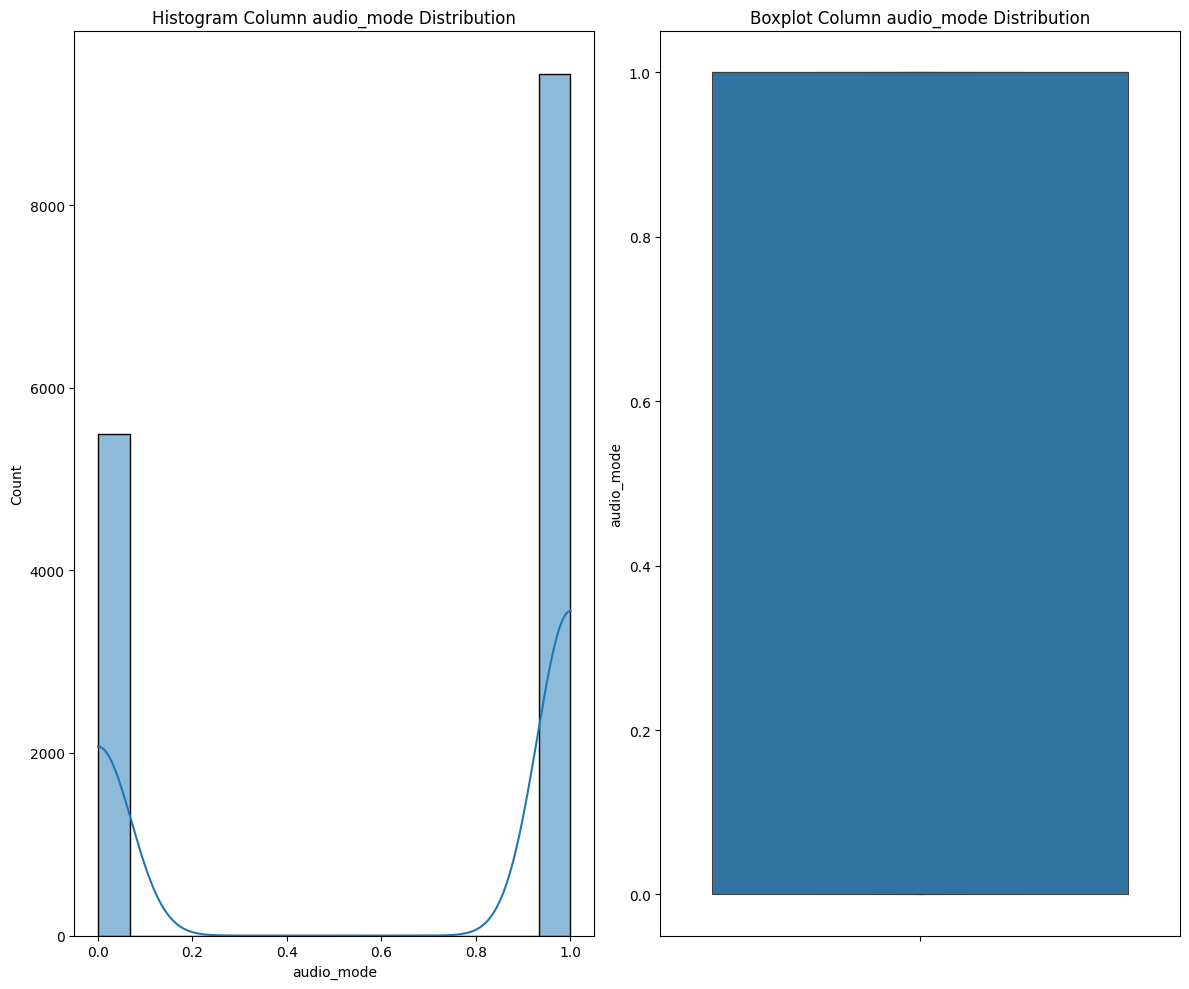

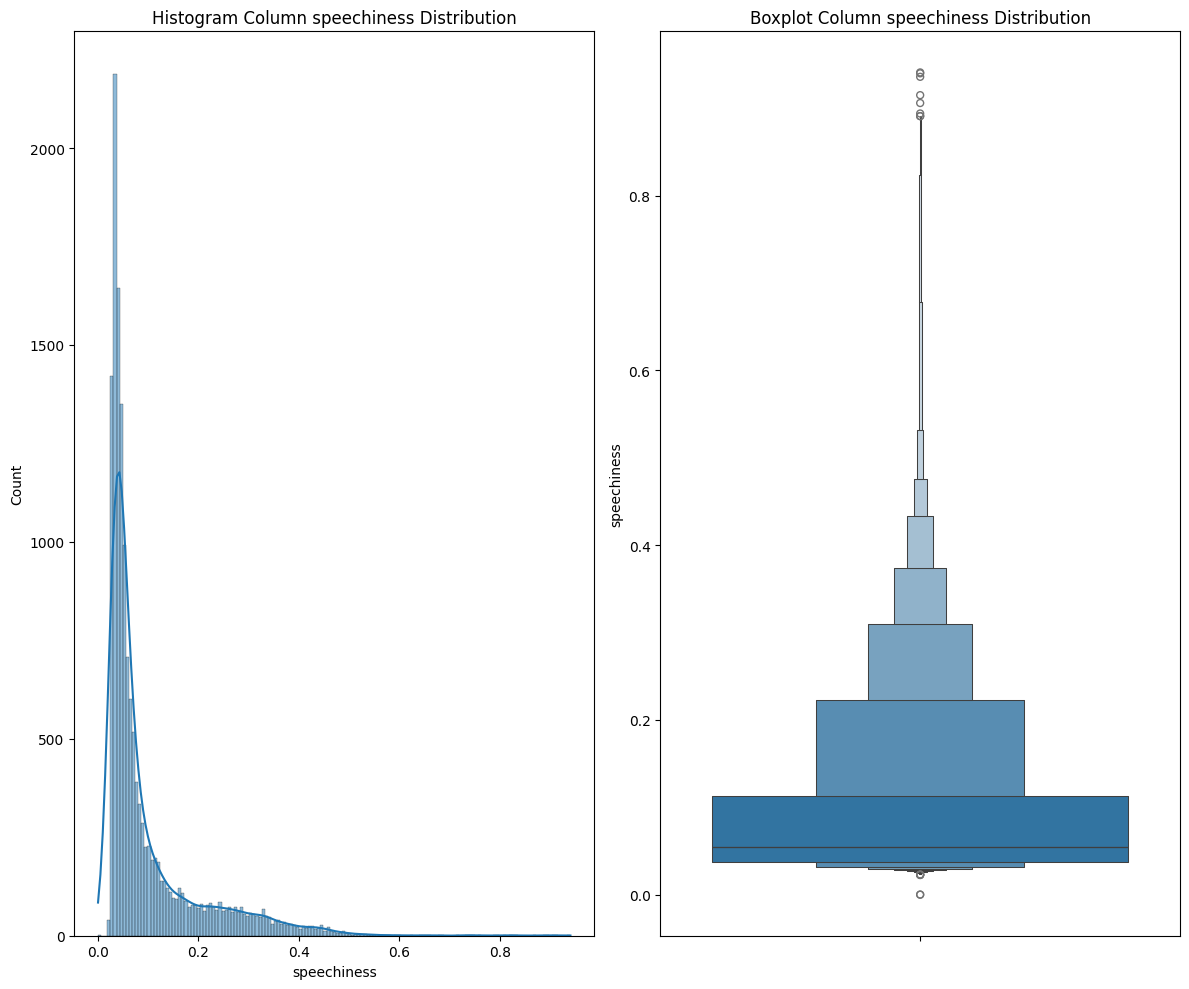

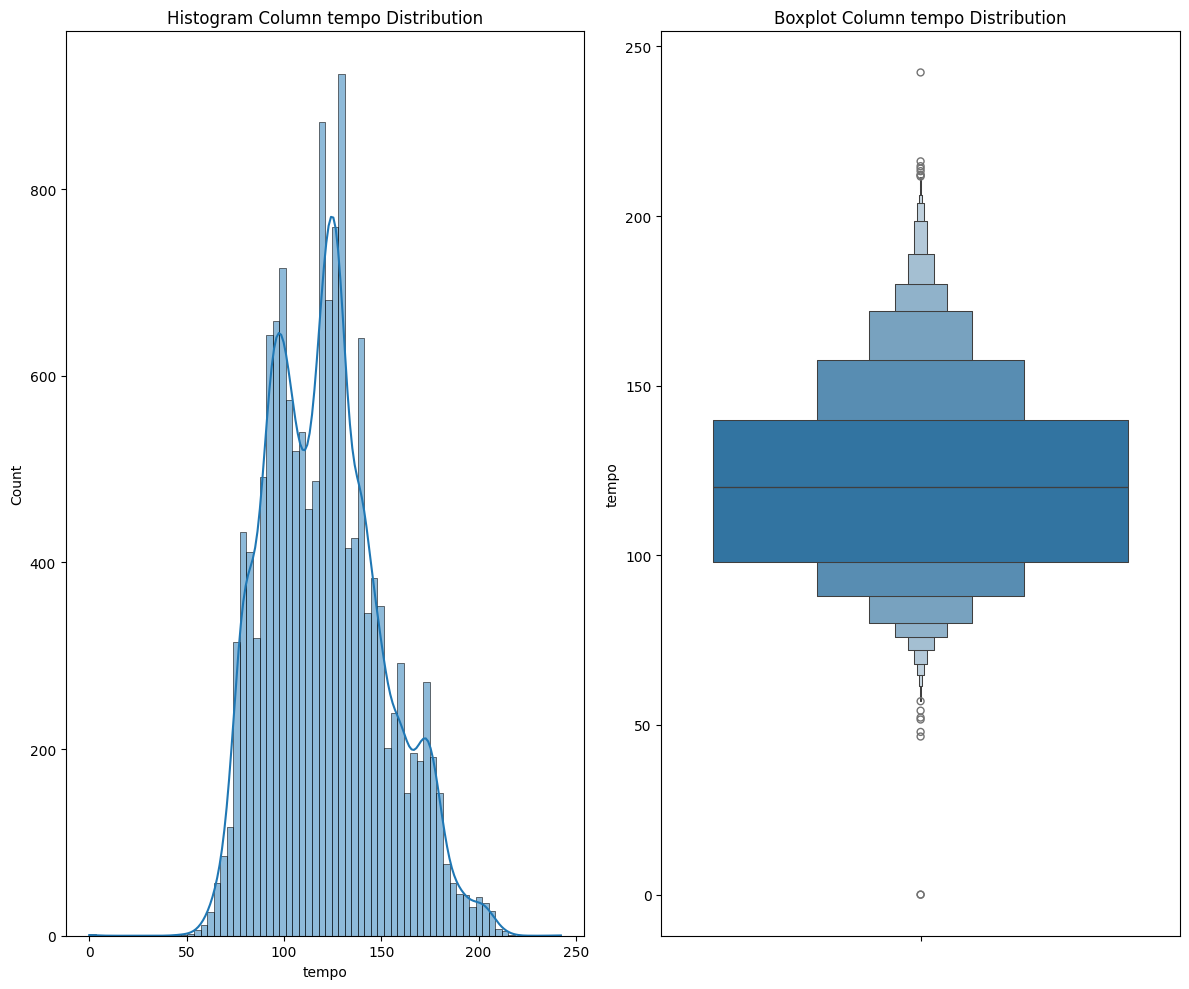

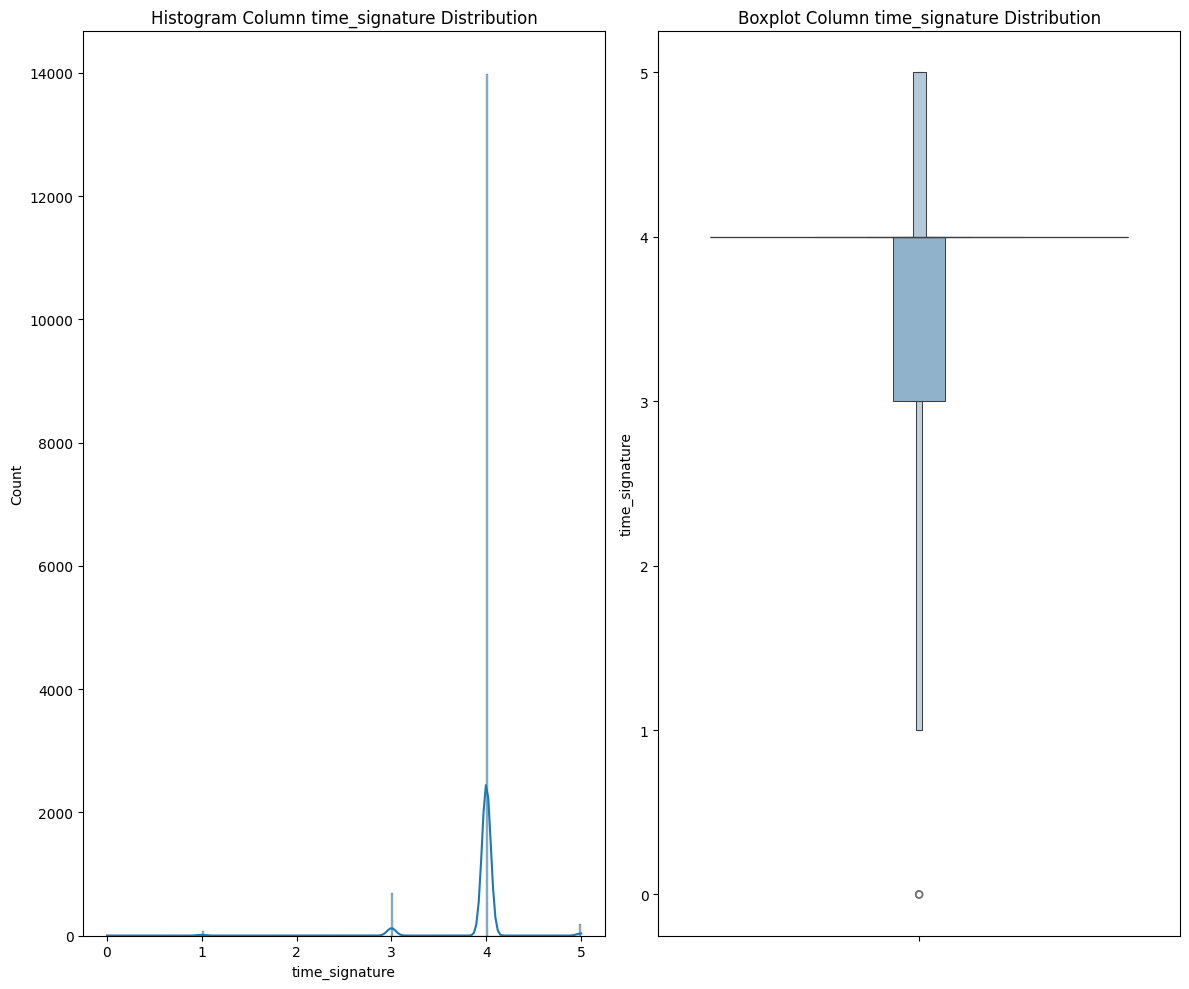

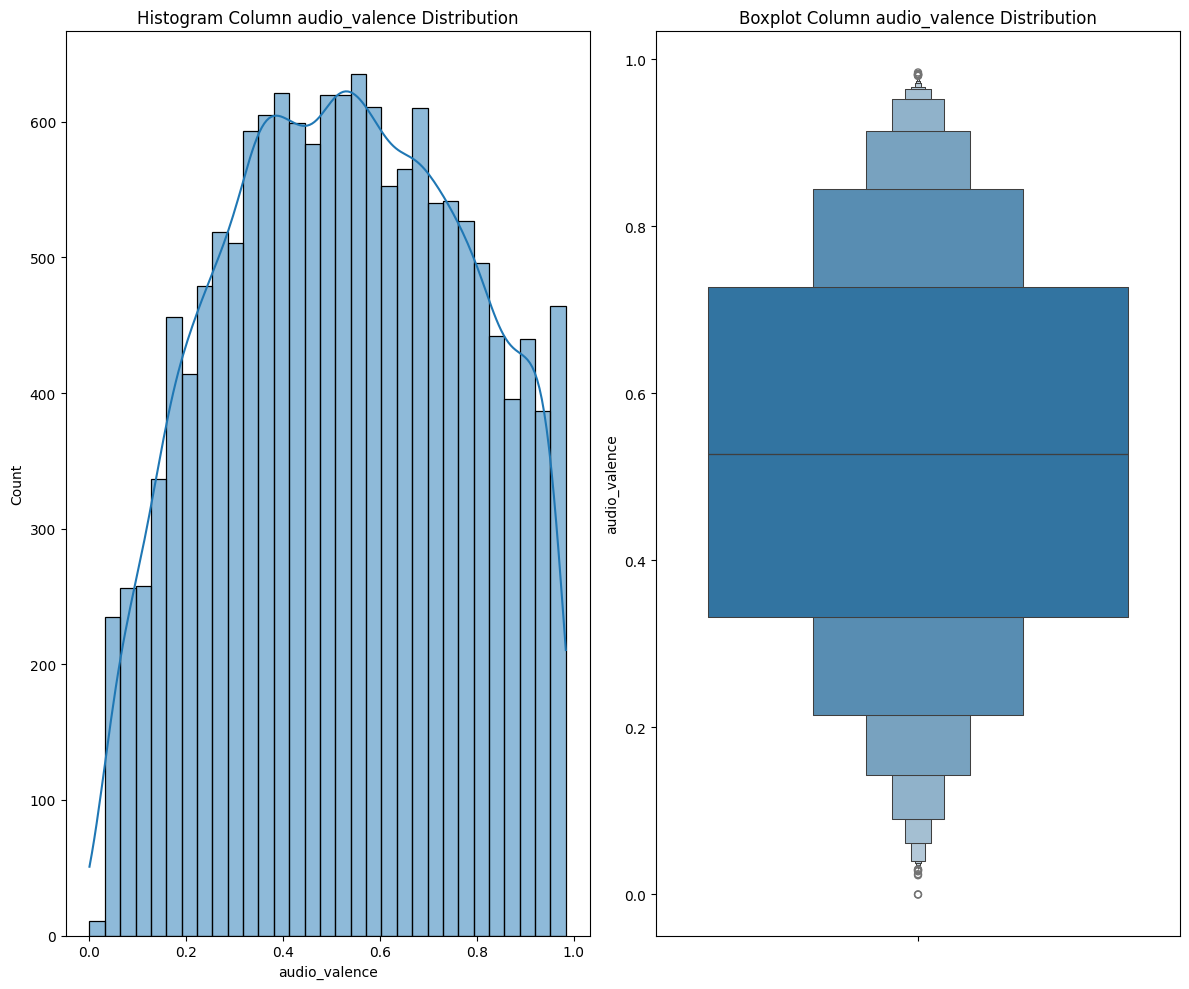

In [132]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram Column {col} Distribution")
    
    sns.boxenplot(df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot Column {col} Distribution")
    plt.tight_layout()

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [133]:
df_clean = df.copy()

In [134]:
df_clean.drop(columns=['song_name'], inplace=True)

In [135]:
df_clean.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

### B.2 Feature Engineering

#### One Hot Encoding

In [136]:
df_clean = pd.get_dummies(df_clean, columns=['key'], prefix='key', drop_first=True, dtype=int)

In [137]:
df_clean.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,...,0,0,0,0,0,0,1,0,0,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,...,0,1,0,0,0,0,0,0,0,0
2,76,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,1,0.0792,...,0,0,0,0,0,0,0,0,0,0
3,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,0.1070,...,0,0,0,0,0,0,0,0,0,0
4,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,0.0313,...,0,0,0,0,0,0,0,0,1,0


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Target Distribution

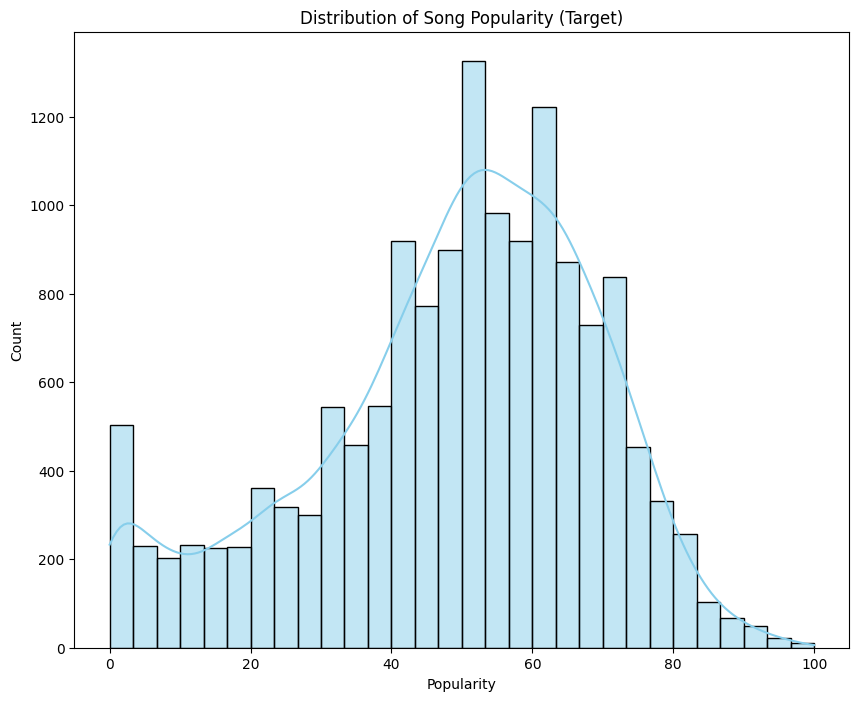

In [138]:
plt.figure(figsize=(10, 8))
sns.histplot(df_clean['song_popularity'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Song Popularity (Target)')
plt.xlabel('Popularity')
plt.show()

#### Feature Distribution

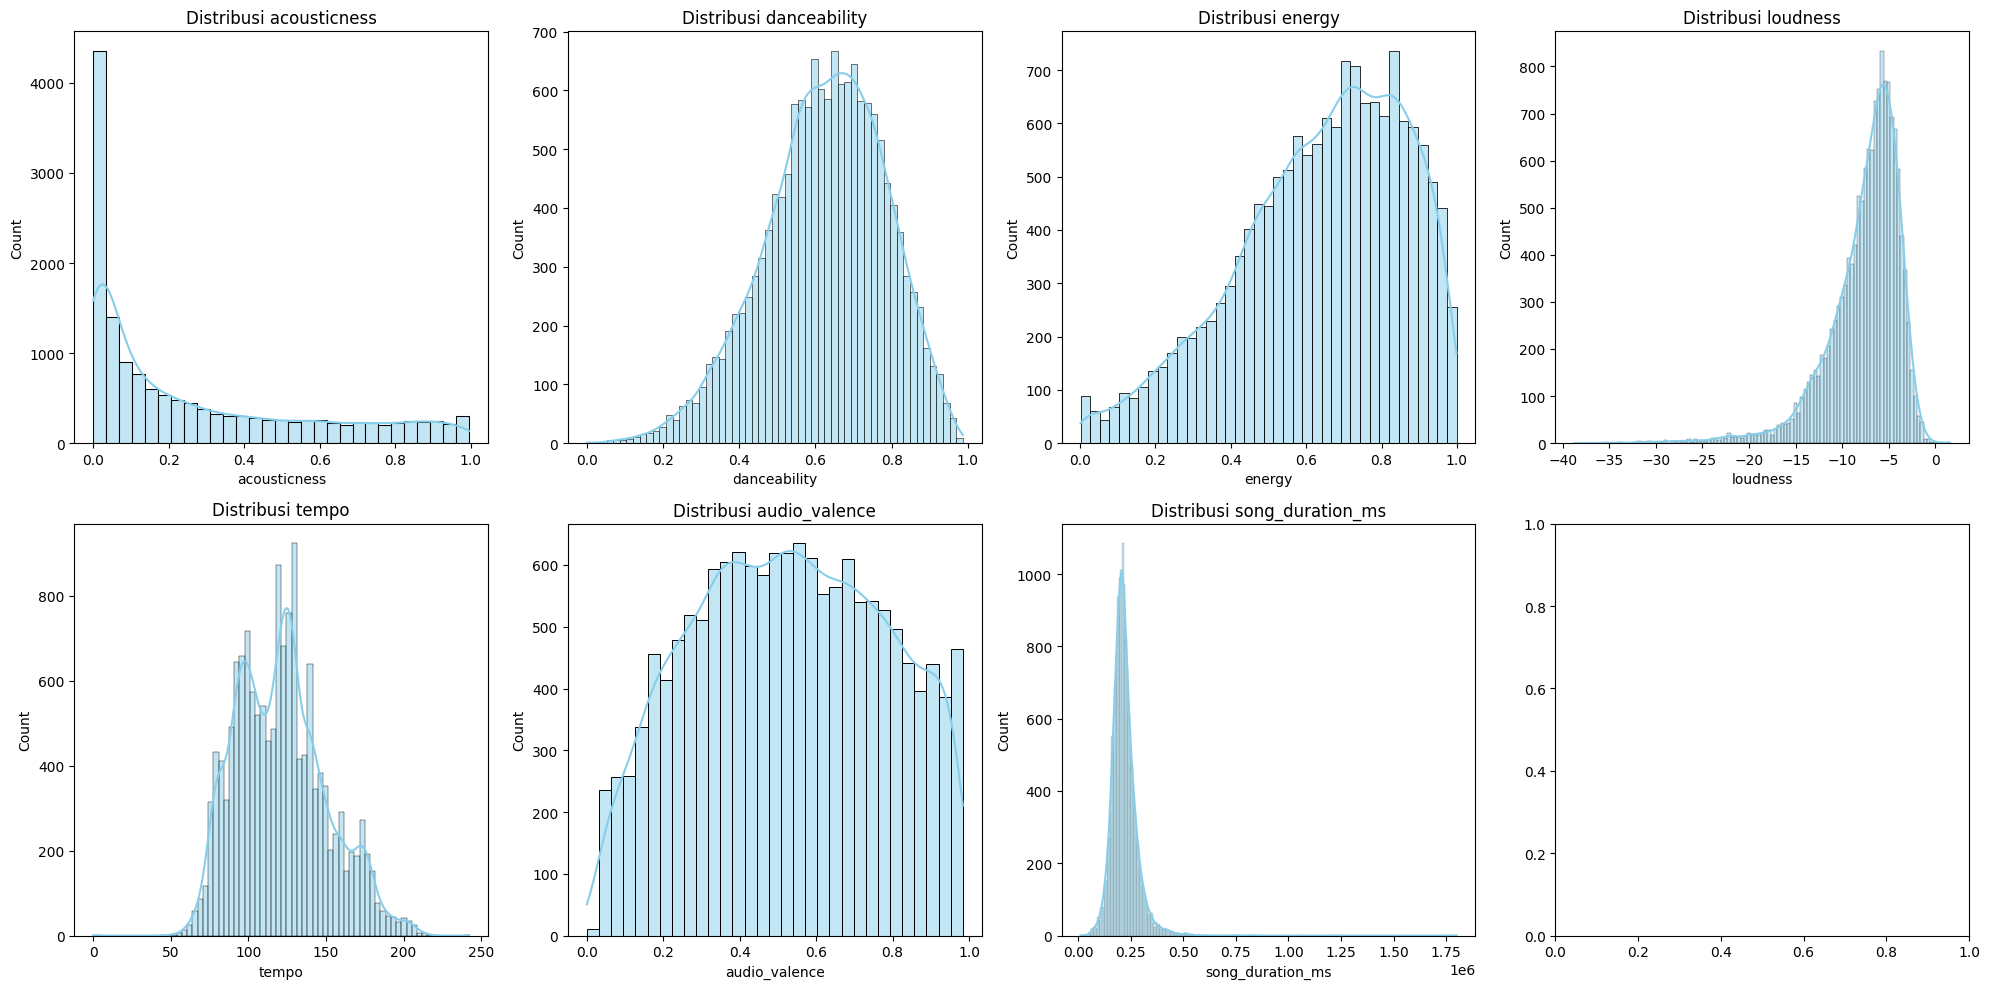

In [139]:
cols = ['acousticness', 'danceability', 'energy', 
        'loudness', 'tempo', 'audio_valence', 'song_duration_ms']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, col in enumerate(cols):
    sns.histplot(df_clean[col], kde=True, color='skyblue', ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

### C.2 Bivariate Analysis

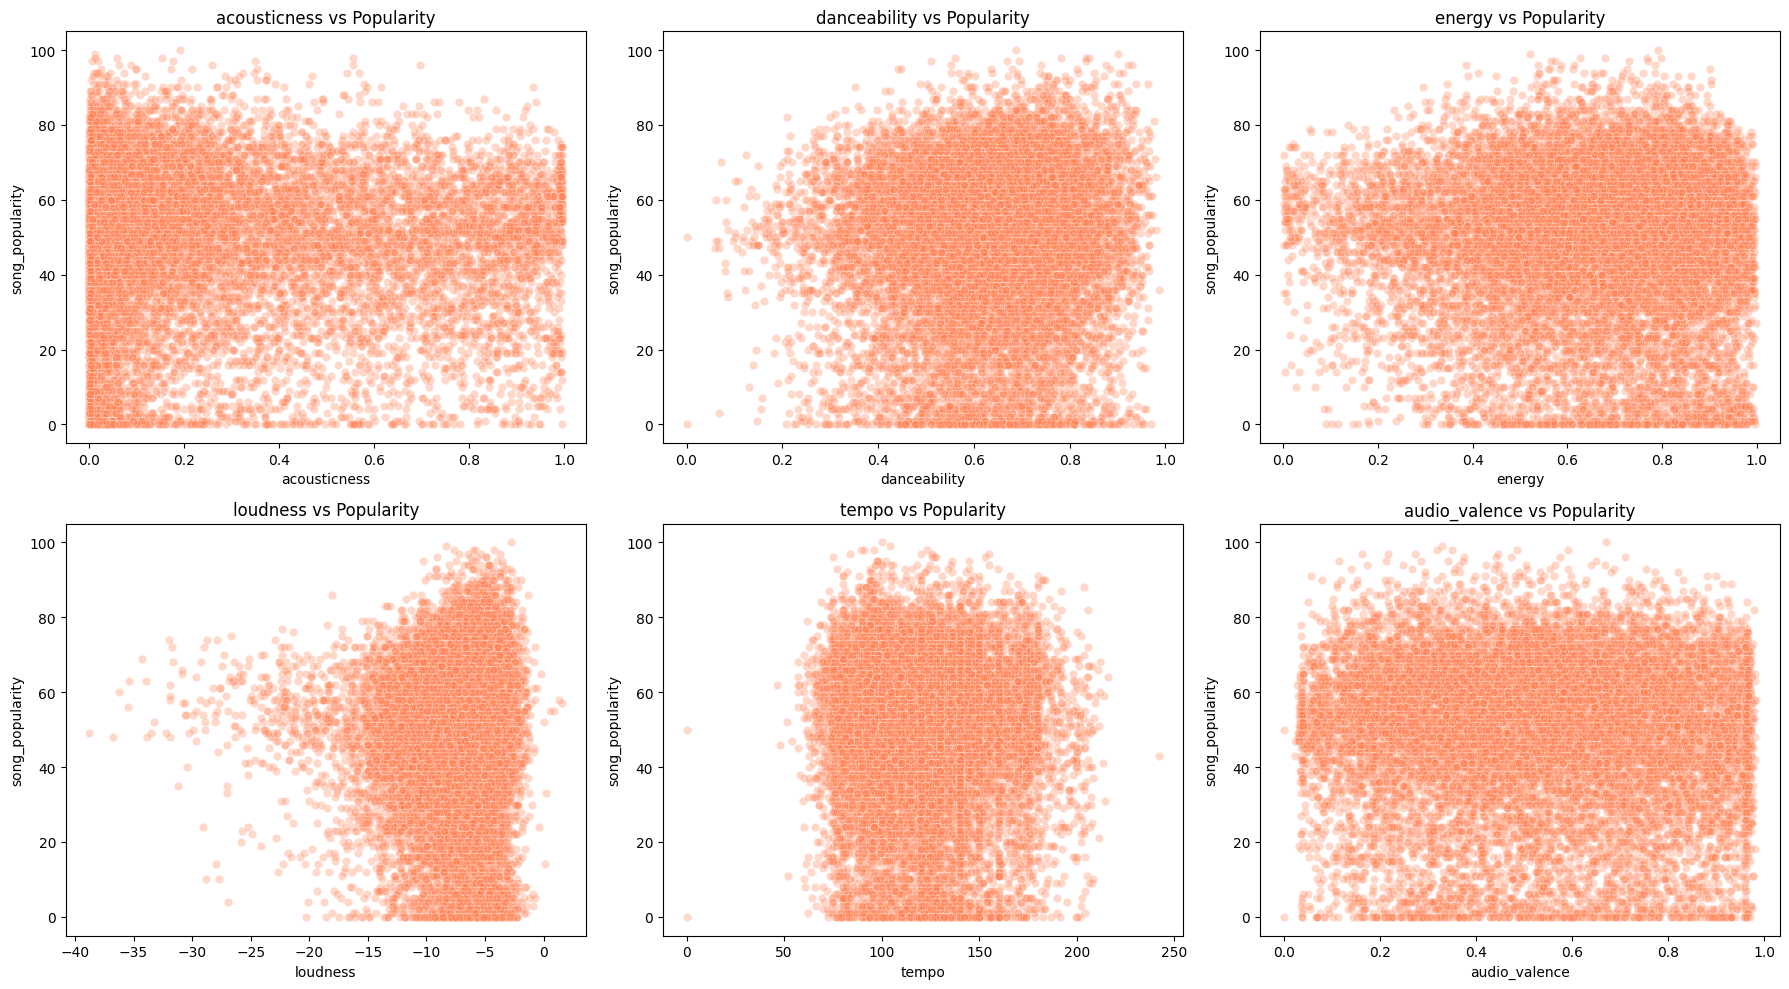

In [140]:
features = ['acousticness', 'danceability', 'energy', 
            'loudness', 'tempo', 'audio_valence']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(features):
    sns.scatterplot(data=df_clean, x=col, y='song_popularity', 
                    ax=axes.flatten()[i], color='coral', alpha=0.3)
    
    # Kasih judul biar jelas
    axes.flatten()[i].set_title(f'{col} vs Popularity')

plt.tight_layout()
plt.show()

### C.3 Multivariate Analysis

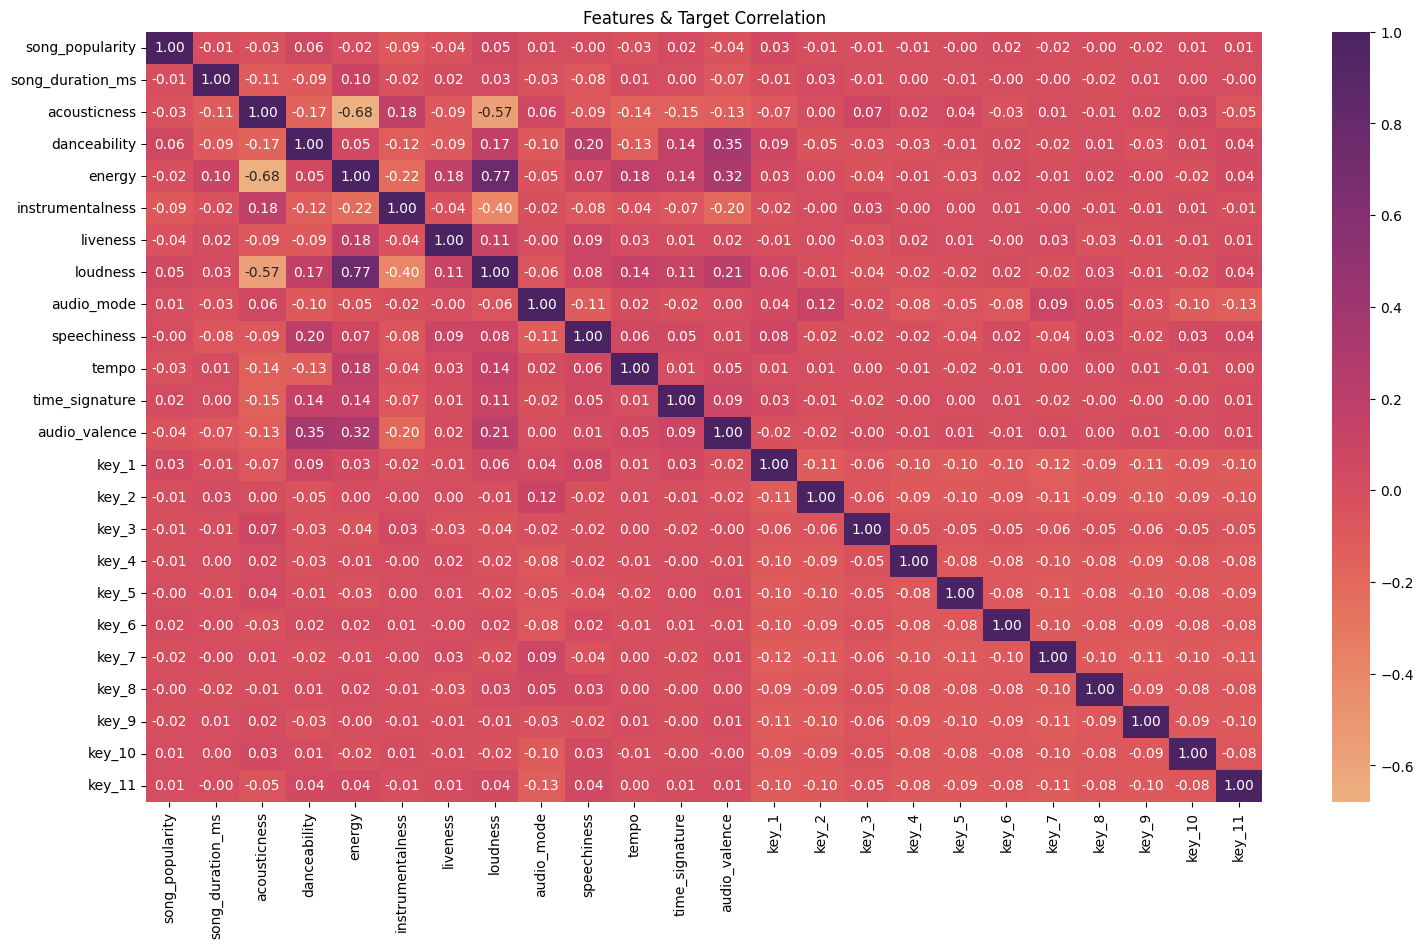

In [141]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='flare', fmt=".2f")
plt.title("Features & Target Correlation")
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [142]:
X_data = df_clean.drop(columns=['song_popularity'])
y_data = df_clean['song_popularity']

### D.2 Splitting Data Test and Data Train (80:20)

In [143]:
np.random.seed(42)
indices = np.random.permutation(len(X_data))

test_size = int(len(X_data) * 0.2)

train_idx = indices[test_size:]
test_idx = indices[:test_size]

X_train, X_test = X_data.iloc[train_idx], X_data.iloc[test_idx]
y_train, y_test = y_data.iloc[train_idx], y_data.iloc[test_idx]

### D.3 Feature Scaling

#### Robust Scale Continous Data (Non-Categorical)

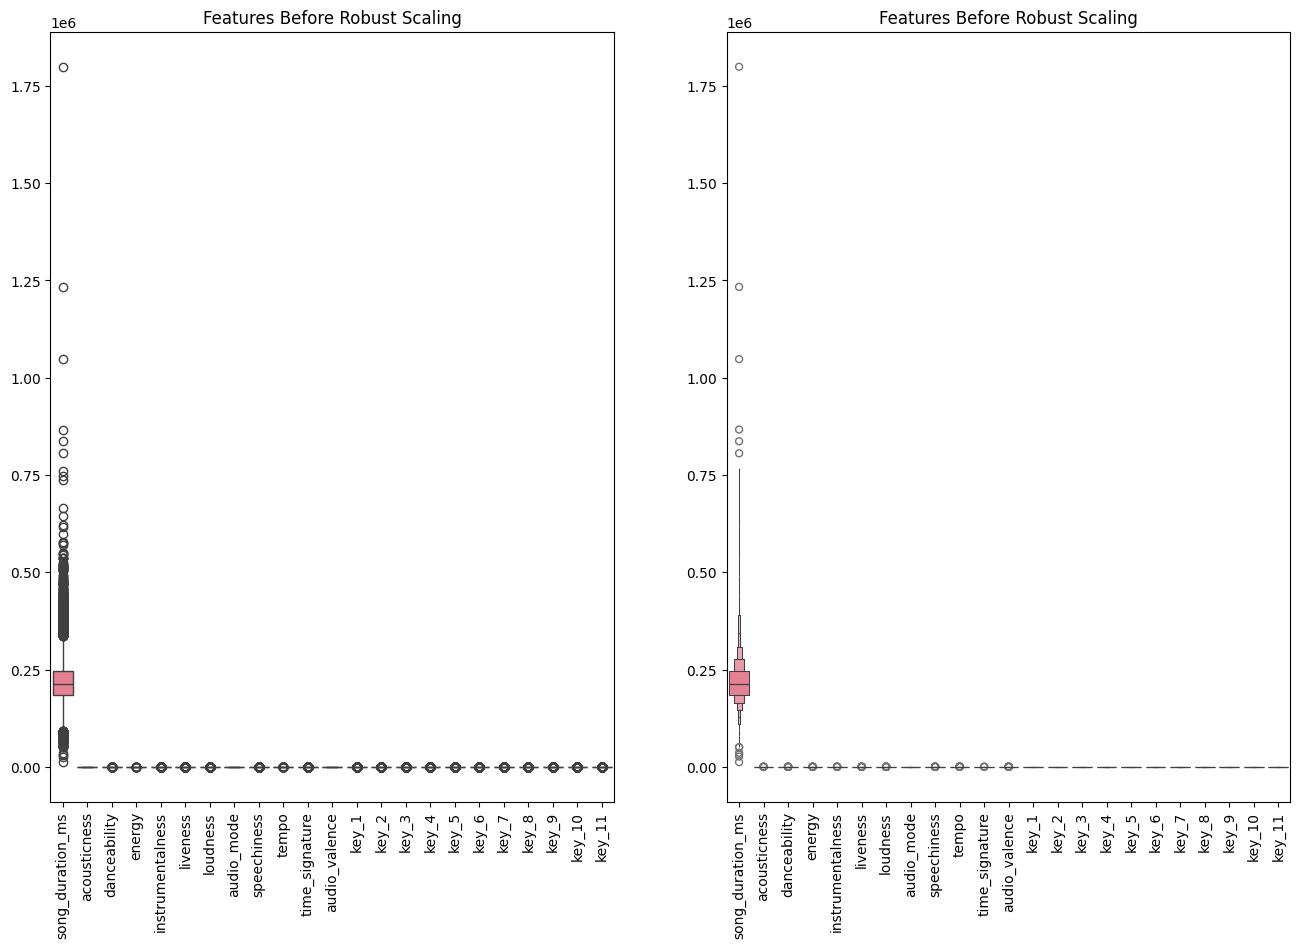

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Features Before Robust Scaling")
axes[0].tick_params(axis='x', rotation=90) 

sns.boxenplot(X_train, ax=axes[1])
axes[1].set_title("Features Before Robust Scaling")
axes[1].tick_params(axis='x', rotation=90) 

In [145]:
# 1. Calculate Statistics (With Only Train Data)
# Find Median & IQR
median = X_train.median(axis=0)
Q1 = X_train.quantile(0.25, axis=0)
Q3 = X_train.quantile(0.75, axis=0)
IQR = Q3 - Q1
IQR[IQR == 0] = 1

# 2. Scale Train & Test Data
X_train = (X_train - median) / IQR
X_test = (X_test - median) / IQR

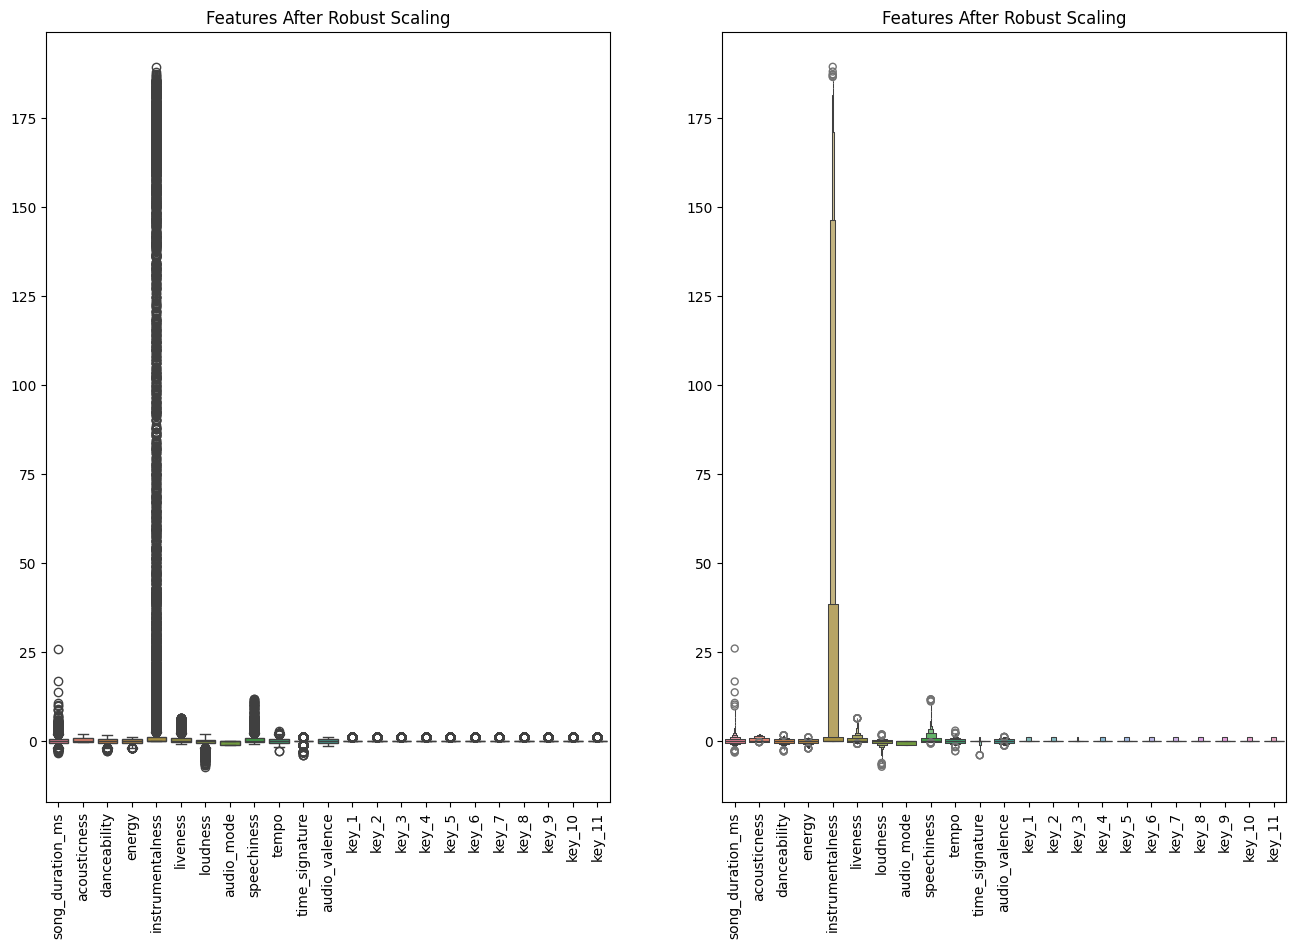

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Features After Robust Scaling")
axes[0].tick_params(axis='x', rotation=90) 

sns.boxenplot(X_train, ax=axes[1])
axes[1].set_title("Features After Robust Scaling")
axes[1].tick_params(axis='x', rotation=90) 

### D.4 Matrix Modification (Add Bias)

In [147]:
ones_train = np.ones((len(X_train), 1))
ones_test = np.ones((len(X_test), 1))

X_train = np.concatenate((ones_train, X_train), axis=1)
X_test = np.concatenate((ones_test, X_test), axis=1)

### D.5 Calculate Theta (OLS Normal Equation)

In [148]:
theta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

test_predictions = X_test @ theta
train_predictions = X_train @ theta

In [149]:
theta.shape

(24,)

### D.6 Modelling Results

In [157]:
features = X_data.columns.tolist()
intercept = theta[0]
coefs = theta[1:]

print("--- MODEL RESULTS ---")
print(f"Intercept (Base Popularity): {intercept:.4f}")
print("-" * 30)

for name, val in zip(features, coefs):
    print(f"Coef {name:<20}: {val:.4f}")

print("\n--- PREDICTION FORMULA ---")
formula = f"y = {intercept:.2f} "
for name, val in zip(features, coefs):
    sign = "+" if val >= 0 else "-"
    formula += f"{sign} ({abs(val):.2f} * {name}) "

print(formula)

--- MODEL RESULTS ---
Intercept (Base Popularity): 50.7300
------------------------------
Coef song_duration_ms    : -0.0831
Coef acousticness        : -1.1068
Coef danceability        : 1.4619
Coef energy              : -2.8683
Coef instrumentalness    : -0.0369
Coef liveness            : -0.6038
Coef loudness            : 1.8901
Coef audio_mode          : 0.7183
Coef speechiness         : -0.2624
Coef tempo               : -0.5139
Coef time_signature      : 0.8390
Coef audio_valence       : -2.2873
Coef key_1               : 1.1896
Coef key_2               : -1.0736
Coef key_3               : -1.4249
Coef key_4               : -0.1231
Coef key_5               : -0.2512
Coef key_6               : 1.3592
Coef key_7               : -1.0584
Coef key_8               : -0.6026
Coef key_9               : -0.4542
Coef key_10              : 1.1902
Coef key_11              : 0.6871

--- PREDICTION FORMULA ---
y = 50.73 - (0.08 * song_duration_ms) - (1.11 * acousticness) + (1.46 * danceability)

### D.7 Modelling Results Visual

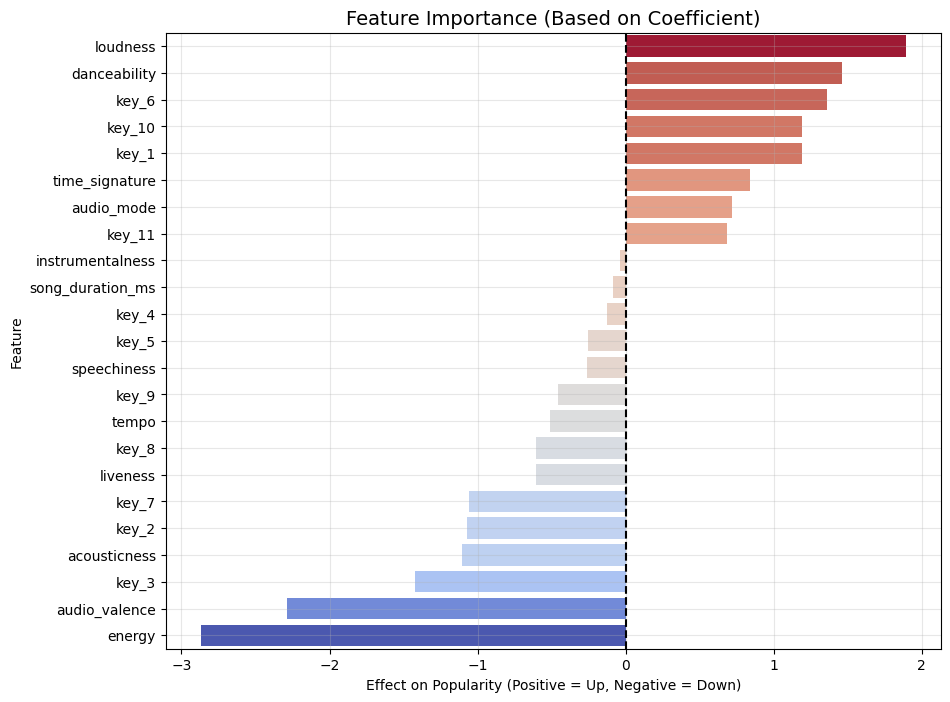

In [160]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs
})

# Most to Less
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
# Plotting
plt.figure(figsize=(10, 8))
# Barplot
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm', hue='Coefficient', legend=False)

plt.title('Feature Importance (Based on Coefficient)', fontsize=14)
plt.xlabel('Effect on Popularity (Positive = Up, Negative = Down)')
plt.axvline(0, color='black', linestyle='--')
plt.grid(True, alpha=0.3)
plt.show()

## E. Evaluation

### E.1 Calculate MSE (Mean Squared Error)

#### Error Test & Train

In [161]:
test_error = y_test - test_predictions
train_error = y_train - train_predictions

#### Test MSE

In [162]:
test_mse = np.mean(test_error ** 2)
print(f"MSE (Test): {test_mse:.2f}")

MSE (Test): 402.67


#### Train MSE

In [163]:
train_mse = np.mean(train_error ** 2)
print(f"MSE (Train): {train_mse:.2f}")

MSE (Train): 405.73


### E.2 Calculate MAE (Mean Absolute Error)

#### Test MAE

In [164]:
test_mae = np.mean(np.abs(test_error))
print(f"MAE (Test): {test_mae:.2f}")

MAE (Test): 15.98


#### Train MAE

In [165]:
train_mae = np.mean(np.abs(train_error))
print(f"MAE (Train): {train_mae:.2f}")

MAE (Train): 16.02


### E.3 Calculate RMSE (Root Mean Squared Error)

#### Test RMSE

In [166]:
test_rmse = np.sqrt(test_mse)
print(f"RMSE (Test): {test_rmse:.2f}")

RMSE (Test): 20.07


#### Train RMSE

In [167]:
train_rmse = np.sqrt(train_mse)
print(f"RMSE (Train): {train_rmse:.2f}")

RMSE (Train): 20.14


### E.4 Calculate R-Squared (Accuracy)

#### Test R-Squared

In [168]:
test_ss_residual = np.sum(test_error ** 2)
test_ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
test_r_squared = 1 - test_ss_residual / test_ss_total
print(f"R-Squared (Test): {test_r_squared}")

R-Squared (Test): 0.019747353178931504


#### Train R-Squared

In [169]:
train_ss_residual = np.sum(train_error ** 2)
train_ss_total = np.sum((y_train - np.mean(y_train)) ** 2)
train_r_squared = 1 - train_ss_residual / train_ss_total
print(f"R-Squared (Train): {train_r_squared}")

R-Squared (Train): 0.02566022896676634


### E.5 Calculate Adjusted R-Squared (Accuracy)

#### Test Adjusted R-Squared

In [170]:
test_n = len(y_test)
test_p = X_test.shape[1] - 1

test_adj_r_squared = 1 - ((1 - test_r_squared) * (test_n - 1) / (test_n - test_p - 1))
print(f"Adjusted R-Squared (Test): {test_adj_r_squared}")

Adjusted R-Squared (Test): 0.012133097563637785


#### Train Adjusted R-Squared

In [171]:
train_n = len(y_train)
train_p = X_train.shape[1] - 1

train_adj_r_squared = 1 - ((1 - train_r_squared) * (train_n - 1) / (train_n - train_p - 1))
print(f"Adjusted R-Squared (Train): {train_adj_r_squared}")

Adjusted R-Squared (Train): 0.023779737674178847


### E.6 Residuals VS Predictions

Text(0.5, 0, 'Error (Residuals)')

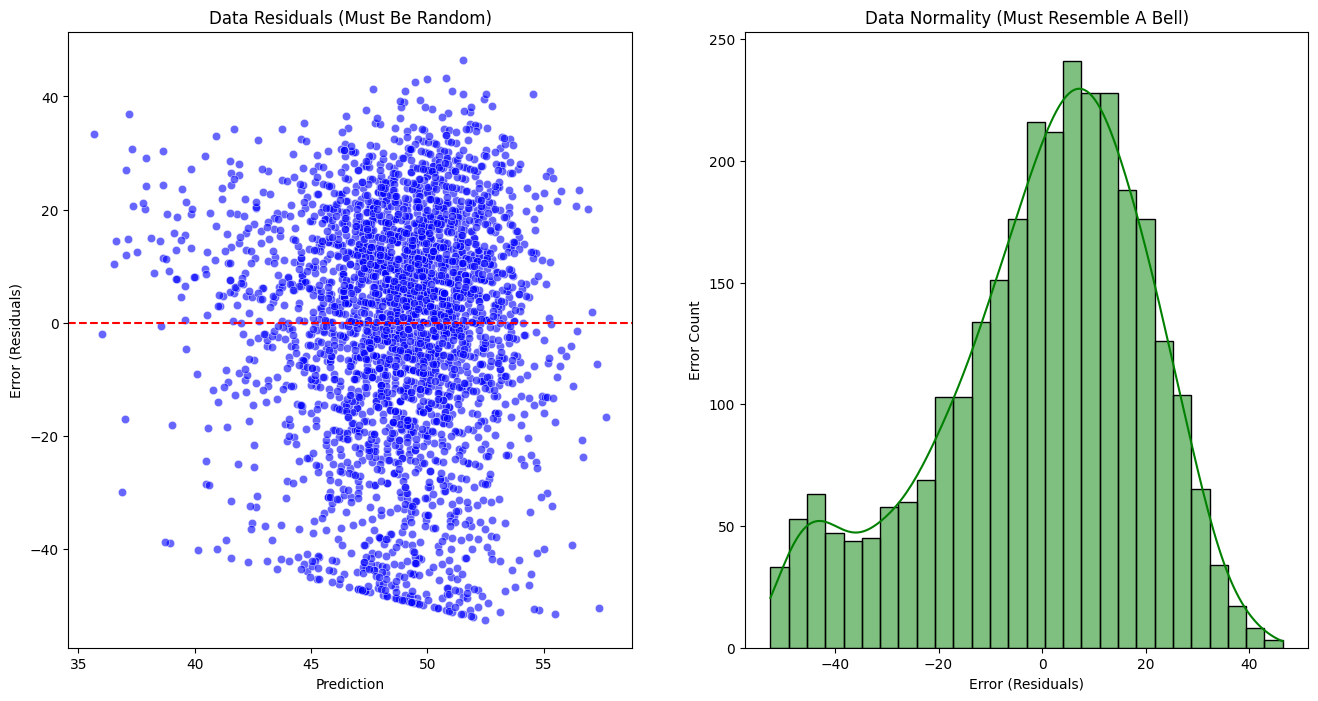

In [173]:
residuals = y_test - test_predictions

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(y=residuals, x=test_predictions, ax=axes[0], alpha=0.6, color='blue')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title("Data Residuals (Must Be Random)")
axes[0].set_ylabel("Error (Residuals)")
axes[0].set_xlabel("Prediction")

sns.histplot(residuals, ax=axes[1], kde=True, color='green')
axes[1].set_title("Data Normality (Must Resemble A Bell)")
axes[1].set_ylabel("Error Count")
axes[1].set_xlabel("Error (Residuals)")

### E.7 Model Evaluation (Visual)

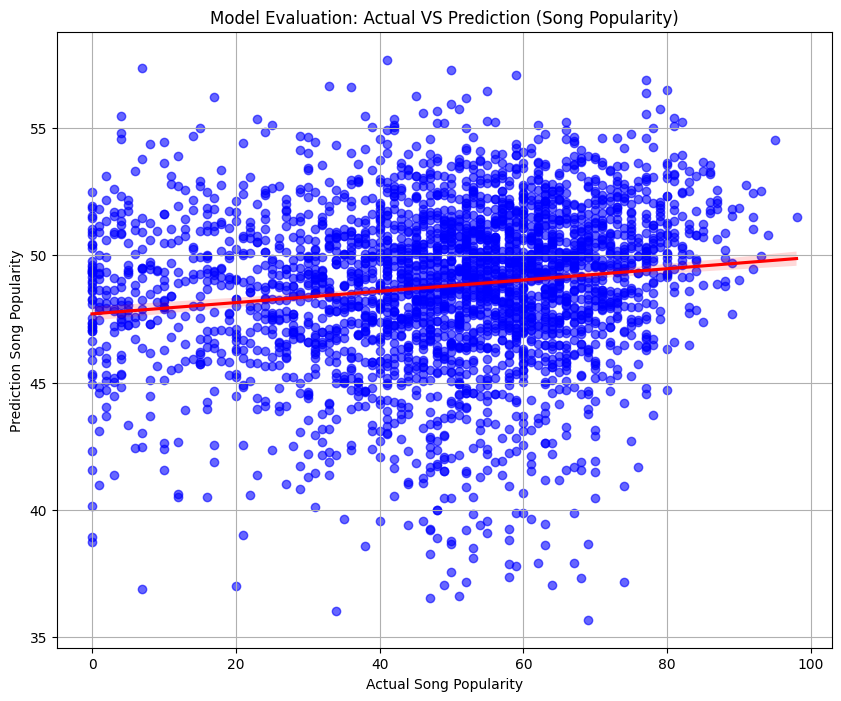

In [176]:
plt.figure(figsize=(10, 8))

sns.regplot(x=y_test, y=test_predictions, color='blue', line_kws={'color' : 'red'}, scatter_kws={'alpha' : 0.6}, order=1)
plt.title("Model Evaluation: Actual VS Prediction (Song Popularity)")
plt.xlabel("Actual Song Popularity")
plt.ylabel("Prediction Song Popularity")
plt.grid(True)

plt.show()